In [2]:
!pip install dython

In [3]:
import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from sklearn.utils import resample
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm

In [4]:
art_dir = '/kaggle/input/toy-art-data/toy_dataset/toy_dataset'
data_desrc_dir = '/kaggle/input/toy-art-data/toy_dataset_label.csv'
data_descr = pd.read_csv(data_desrc_dir, sep='\t')

In [5]:
labels_df = data_descr.drop(columns=['TITLE', 'DATE', 'LOCATION', 'URL', 'BORN-DIED'])

In [6]:
labels_df['TECHNIQUE'] = labels_df['TECHNIQUE'].str.extract('(([a-zA-Z]+\s*)+,?)').replace(',','', regex=True)[0]
techniques = labels_df['TECHNIQUE'].value_counts()[labels_df['TECHNIQUE'].value_counts() >= 30].index.tolist()
for tech_label in labels_df['TECHNIQUE'].unique():
  if tech_label not in techniques:
    labels_df['TECHNIQUE'] = labels_df['TECHNIQUE'].replace(tech_label, '-')

In [7]:
for label in labels_df['AUTHOR'].value_counts().index:
  if labels_df['AUTHOR'].value_counts()[label] < 10:
    labels_df['AUTHOR'] = labels_df['AUTHOR'].replace(label, '-')
  if ('MINIATURIST' or 'PAINTER' or 'UNKNOWN' or 'SCULPTOR') in label:
    labels_df['AUTHOR'] = labels_df['AUTHOR'].replace(label, 'UNKNOWN')

In [8]:
labels_df = labels_df[(labels_df['FORM'] == 'painting') | (labels_df['FORM'] == 'tapestry') | (labels_df['FORM'] == 'graphics')] 

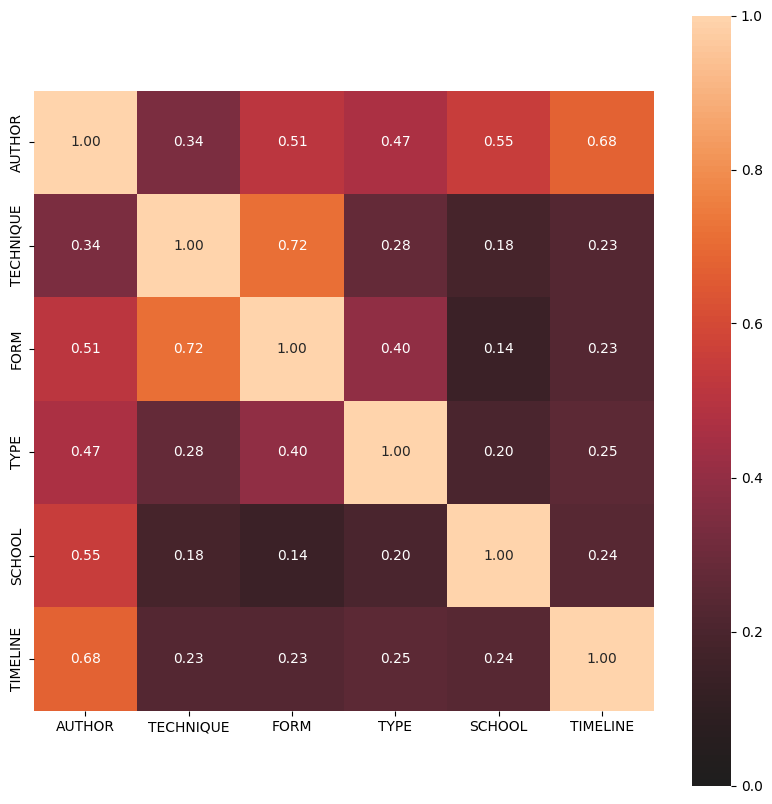

In [9]:
complete_correlation = associations(labels_df.drop(columns=['FILE', 'ID']), figsize=(10,10))

In [10]:
labels_df = labels_df.dropna()

In [11]:
labels_df.shape

(33929, 8)

In [12]:
labels_df['TECHNIQUE'].value_counts()

TECHNIQUE
Oil on canvas           13667
Fresco                   4309
-                        3392
Oil on panel             3050
Oil on wood              1850
                        ...  
Gilded bronze               3
Silver                      2
Manuscript                  2
Stucco                      2
Stained glass window        1
Name: count, Length: 63, dtype: int64

<Axes: xlabel='TECHNIQUE'>

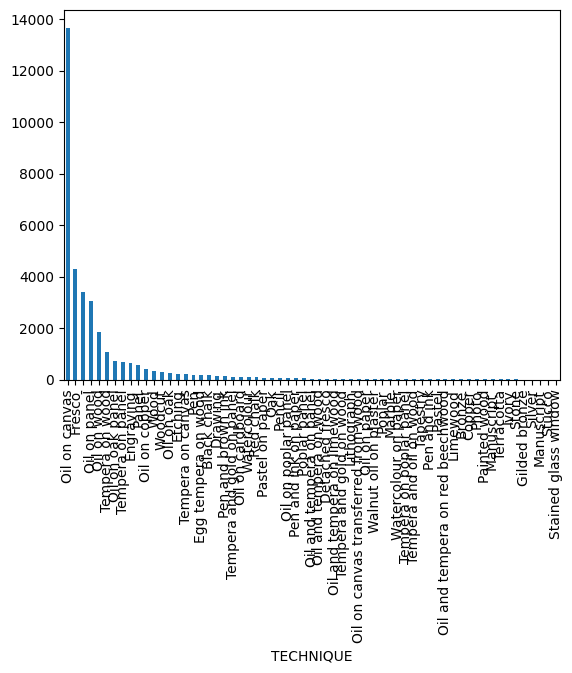

In [13]:
labels_df['TECHNIQUE'].value_counts().plot(kind='bar')

<Axes: xlabel='TYPE'>

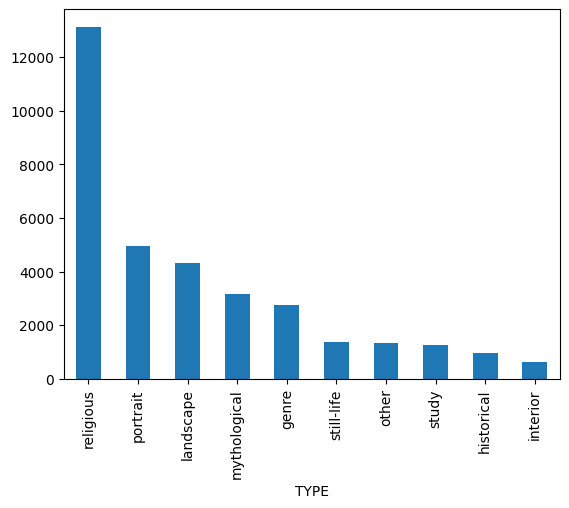

In [14]:
labels_df['TYPE'].value_counts().plot(kind='bar')

In [15]:
labels_df['TYPE'].value_counts()

TYPE
religious       13125
portrait         4941
landscape        4328
mythological     3159
genre            2770
still-life       1396
other            1348
study            1265
historical        981
interior          616
Name: count, dtype: int64

<Axes: xlabel='TYPE'>

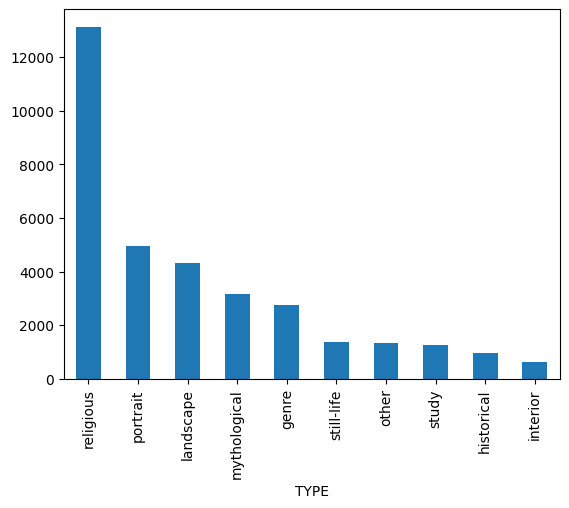

In [16]:
labels_df['TYPE'].value_counts().plot(kind='bar')

In [17]:
labels_df['SCHOOL'].value_counts()

SCHOOL
Italian          14050
Dutch             4934
French            4602
Flemish           3491
German            2531
Spanish           1282
English            740
Netherlandish      635
Hungarian          360
Austrian           315
American           180
Swiss              146
Russian            125
Belgian             81
Scottish            76
Danish              65
Catalan             50
Bohemian            47
Greek               47
Other               35
Irish               33
Swedish             32
Polish              23
Portuguese          22
Norwegian           22
Finnish              5
Name: count, dtype: int64

<Axes: xlabel='SCHOOL'>

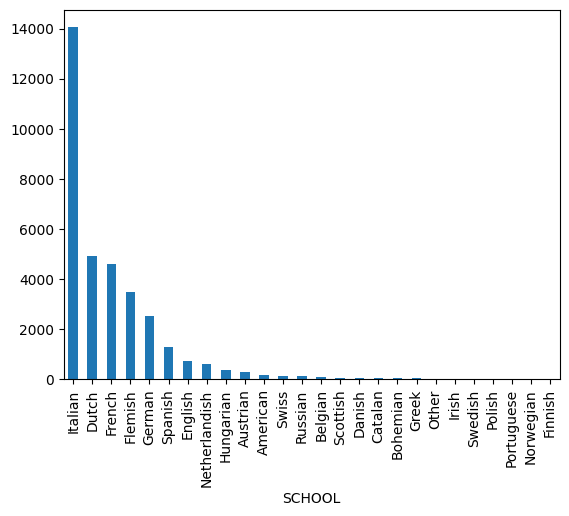

In [18]:
labels_df['SCHOOL'].value_counts().plot(kind='bar')

In [19]:
labels_df['TIMELINE'].value_counts()

TIMELINE
1601-1650    5569
1501-1550    5374
1451-1500    3926
1651-1700    3354
1851-1900    3132
1551-1600    2828
1701-1750    2270
1801-1850    1829
1751-1800    1759
1401-1450    1621
1301-1350    1316
1351-1400     556
1251-1300     219
1051-1100      59
1201-1250      45
1151-1200      31
1101-1150      23
0951-1000       5
0801-0850       5
0751-0800       4
0851-0900       3
1001-1050       1
Name: count, dtype: int64

<Axes: xlabel='TIMELINE'>

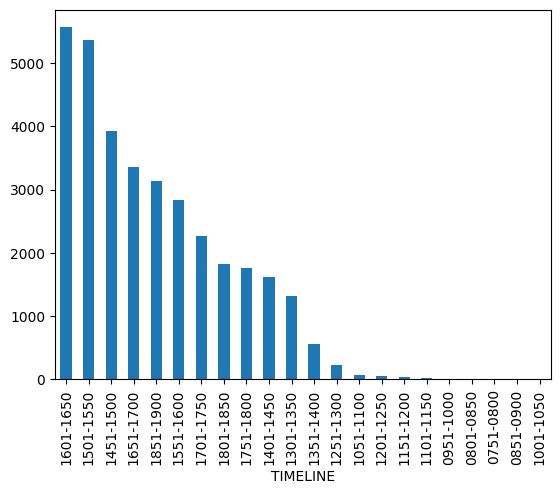

In [20]:
labels_df['TIMELINE'].value_counts().plot(kind='bar')

In [21]:
for id in tqdm(['TECHNIQUE', 'TYPE', 'TIMELINE', 'SCHOOL']):
    for val in tqdm(labels_df[id].value_counts().index):
        avg = int(labels_df[id].value_counts().mean()) + 500
        if labels_df[id].value_counts()[val] <= avg:
            minority_class = labels_df[labels_df[id] == val]
            majority_class = labels_df[labels_df[id] != val]
            minority_upsampled = resample(minority_class, replace=True, n_samples=avg, random_state=42)
            labels_df = pd.concat([majority_class, minority_upsampled])
        else: 
            majority_class = labels_df[labels_df[id] == val]
            minority_class = labels_df[labels_df[id] != val]
            majority_downsampled = resample(majority_class, replace=False, n_samples=avg, random_state=42)
            labels_df = pd.concat([minority_class, majority_downsampled])

100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


In [22]:
labels_df.reset_index(inplace=True)

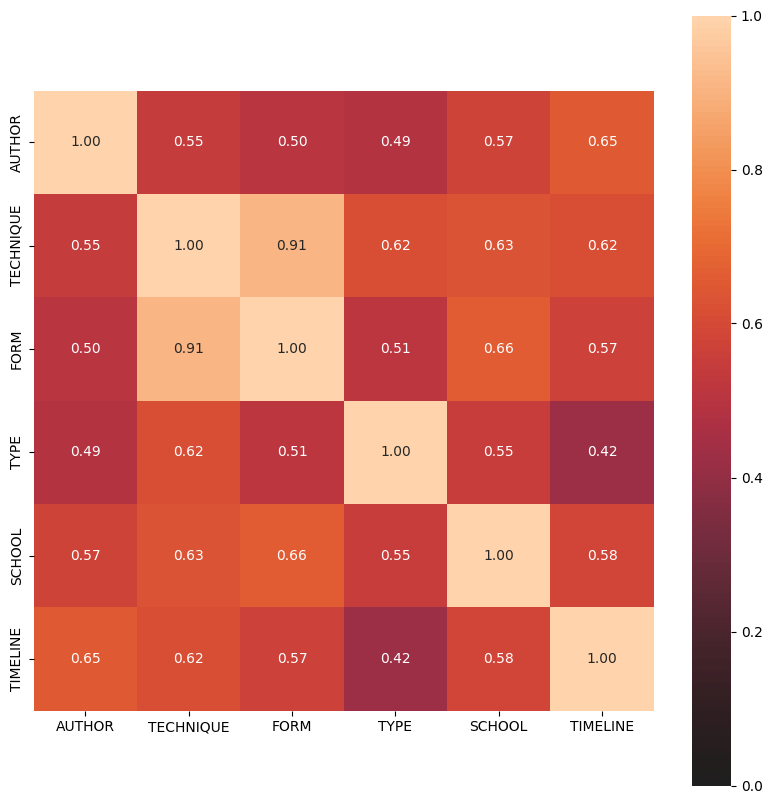

In [23]:
complete_correlation = associations(labels_df.drop(columns=['FILE', 'ID', 'index']), figsize=(10,10))

In [24]:
len(labels_df['FILE'].unique())

2539

In [25]:
labels_df['TUPLES'] = [(labels_df['TECHNIQUE'][i], labels_df['TYPE'][i], labels_df['SCHOOL'][i], labels_df['TIMELINE'][i]) for i in labels_df.index]

In [26]:
labels_df.shape

(31236, 10)

In [27]:
labels_df['TECHNIQUE'].value_counts()

TECHNIQUE
Oil on paper                2865
Oil on canvas               2534
Wood                        1988
-                           1956
Watercolour on paper        1483
                            ... 
Oil on poplar panel           30
Poplar                        29
Gilded bronze                 26
Oil and tempera on panel      25
Manuscript                    23
Name: count, Length: 63, dtype: int64

<Axes: xlabel='TECHNIQUE'>

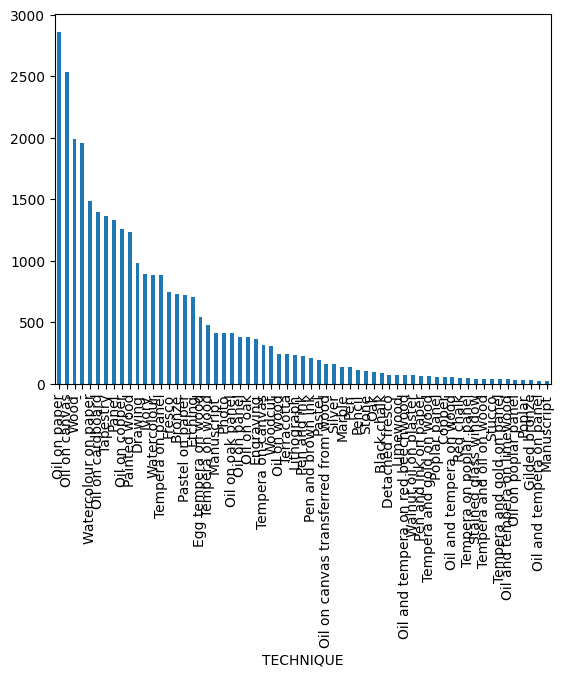

In [28]:
labels_df['TECHNIQUE'].value_counts().plot(kind='bar')

In [29]:
labels_df['TYPE'].value_counts()

TYPE
religious       9648
landscape       6070
genre           3753
still-life      2560
portrait        2454
historical      1756
other           1742
interior        1399
mythological     977
study            877
Name: count, dtype: int64

<Axes: xlabel='TYPE'>

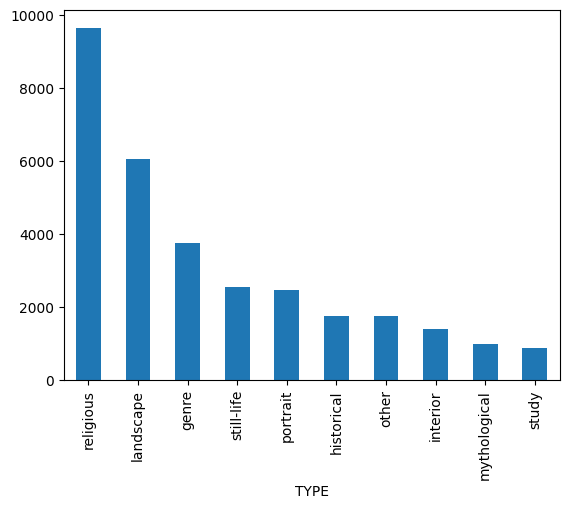

In [30]:
labels_df['TYPE'].value_counts().plot(kind='bar')

In [31]:
labels_df['SCHOOL'].value_counts()

SCHOOL
Italian          2001
Portuguese       1682
Irish            1617
Danish           1556
Other            1496
Norwegian        1439
French           1390
Bohemian         1384
Polish           1332
American         1281
German           1243
Scottish         1233
Greek            1188
Catalan          1145
Dutch            1108
Austrian         1105
Netherlandish    1068
Flemish          1061
Belgian          1034
Swiss            1020
Hungarian        1002
English           979
Swedish           973
Spanish           953
Russian           946
Name: count, dtype: int64

<Axes: xlabel='SCHOOL'>

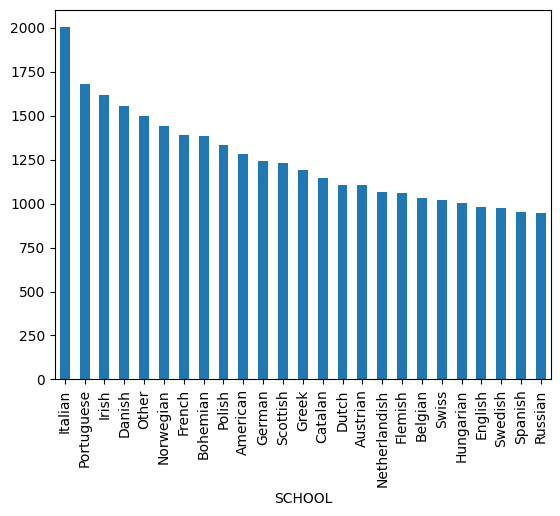

In [32]:
labels_df['SCHOOL'].value_counts().plot(kind='bar')

In [33]:
labels_df['TIMELINE'].value_counts()

TIMELINE
1851-1900    5531
1801-1850    4965
1751-1800    3747
1351-1400    2734
1051-1100    2185
1701-1750    1862
1601-1650    1769
1501-1550    1416
1151-1200    1060
1101-1150    1016
1551-1600     947
1651-1700     893
1451-1500     804
1201-1250     678
1251-1300     558
1401-1450     354
0801-0850     258
0851-0900     258
1301-1350     201
Name: count, dtype: int64

<Axes: xlabel='TIMELINE'>

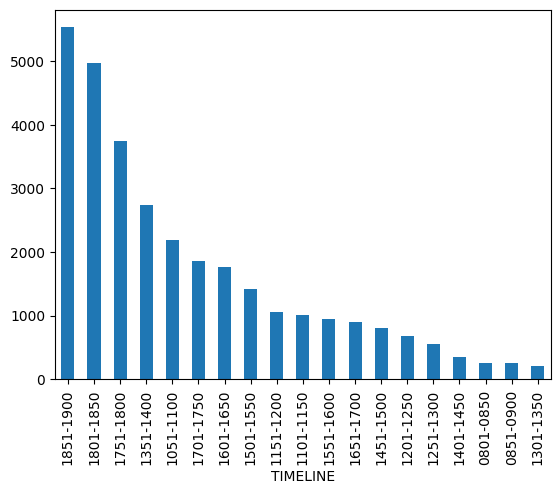

In [34]:
labels_df['TIMELINE'].value_counts().plot(kind='bar')

In [42]:
binarizer = MultiLabelBinarizer()
y = binarizer.fit_transform(labels_df['TUPLES'])
binarizer.classes_

array(['-', '0801-0850', '0851-0900', '1051-1100', '1101-1150',
       '1151-1200', '1201-1250', '1251-1300', '1301-1350', '1351-1400',
       '1401-1450', '1451-1500', '1501-1550', '1551-1600', '1601-1650',
       '1651-1700', '1701-1750', '1751-1800', '1801-1850', '1851-1900',
       'American', 'Austrian', 'Belgian', 'Black chalk', 'Bohemian',
       'Bronze', 'Catalan', 'Copper', 'Danish', 'Detached fresco',
       'Drawing', 'Dutch', 'Egg tempera on wood', 'English', 'Engraving',
       'Etching', 'Flemish', 'French', 'Fresco', 'German',
       'Gilded bronze', 'Greek', 'Hungarian', 'Irish', 'Italian', 'Ivory',
       'Limewood', 'Lithograph', 'Manuscript', 'Manuscript ', 'Marble',
       'Netherlandish', 'Norwegian', 'Oak', 'Oil and tempera on limewood',
       'Oil and tempera on panel', 'Oil and tempera on red beechwood',
       'Oil and tempera on wood', 'Oil on canvas',
       'Oil on canvas transferred from wood', 'Oil on cardboard',
       'Oil on copper', 'Oil on oak', 'Oi

In [36]:
labels_df.to_csv('labels_new.csv', index=False)

In [37]:
y.shape

(31236, 117)